In [1]:
!pip install yfinance --upgrade --no-cache-dir

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,AMAZON
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000,AMAZON
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000,AMAZON
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400,AMAZON
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500,AMAZON
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800,AMAZON
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800,AMAZON
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,AMAZON
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,AMAZON


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,173.621515,175.216773,172.370837,173.944901,173.535700,5.865948e+07
std,16.184539,15.913242,16.113756,15.906660,16.082021,1.727281e+07
min,131.250000,133.509995,130.460007,133.410004,132.668442,2.404830e+07
25%,164.430000,165.495003,163.264999,164.959999,164.293549,4.768055e+07
50%,176.479996,177.839996,174.940002,176.380005,176.147934,5.492910e+07
75%,186.989998,188.250000,185.119995,187.220001,186.952606,6.546495e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-11 to 2024-01-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


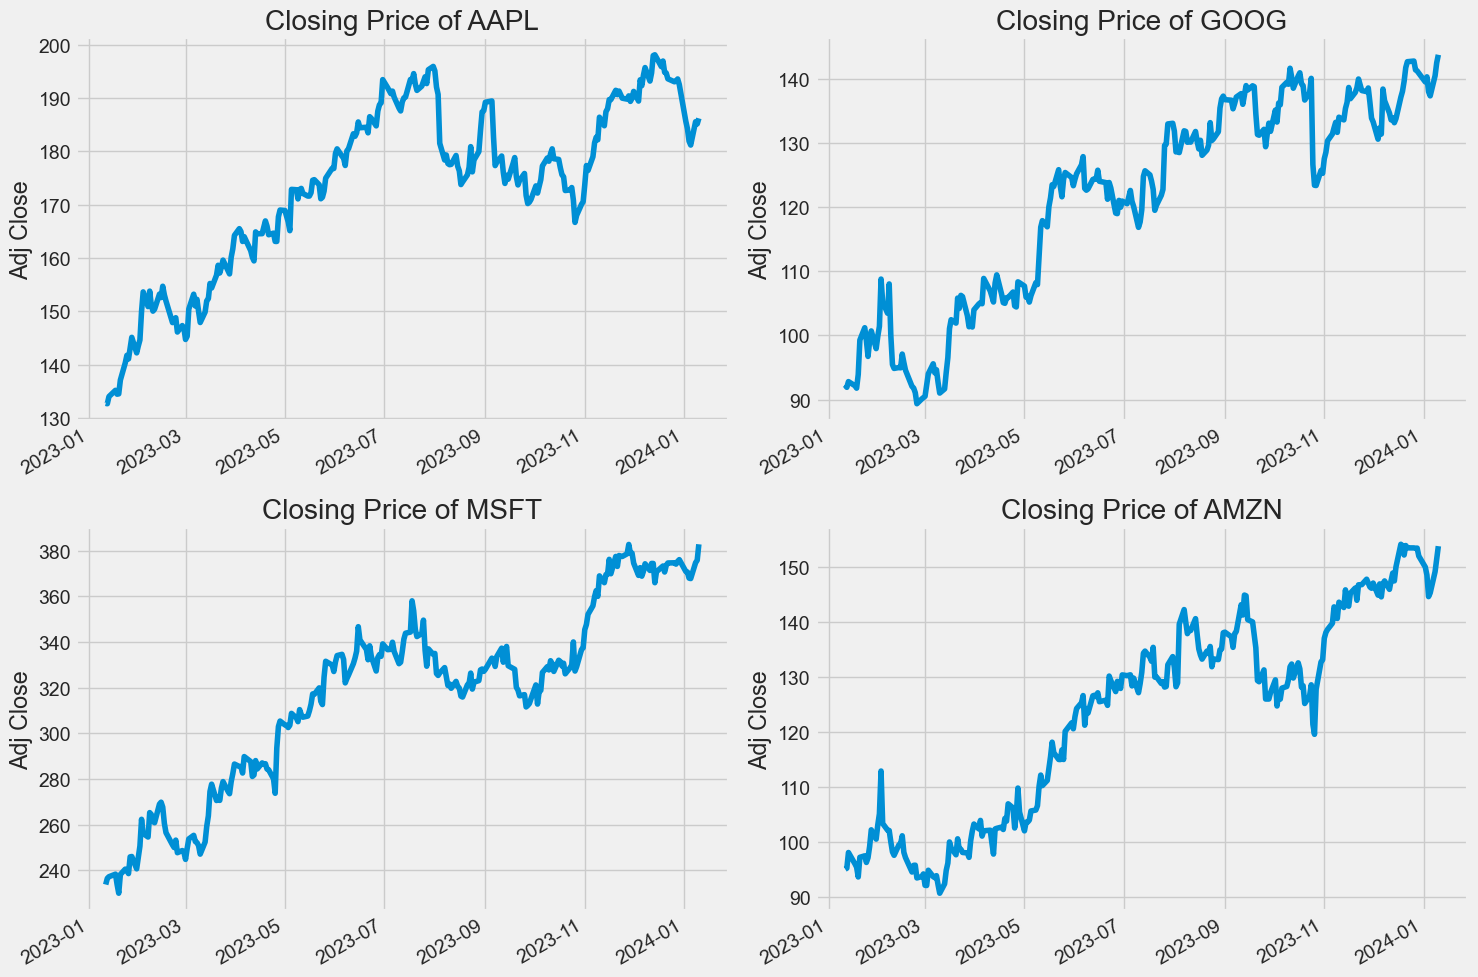

In [17]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

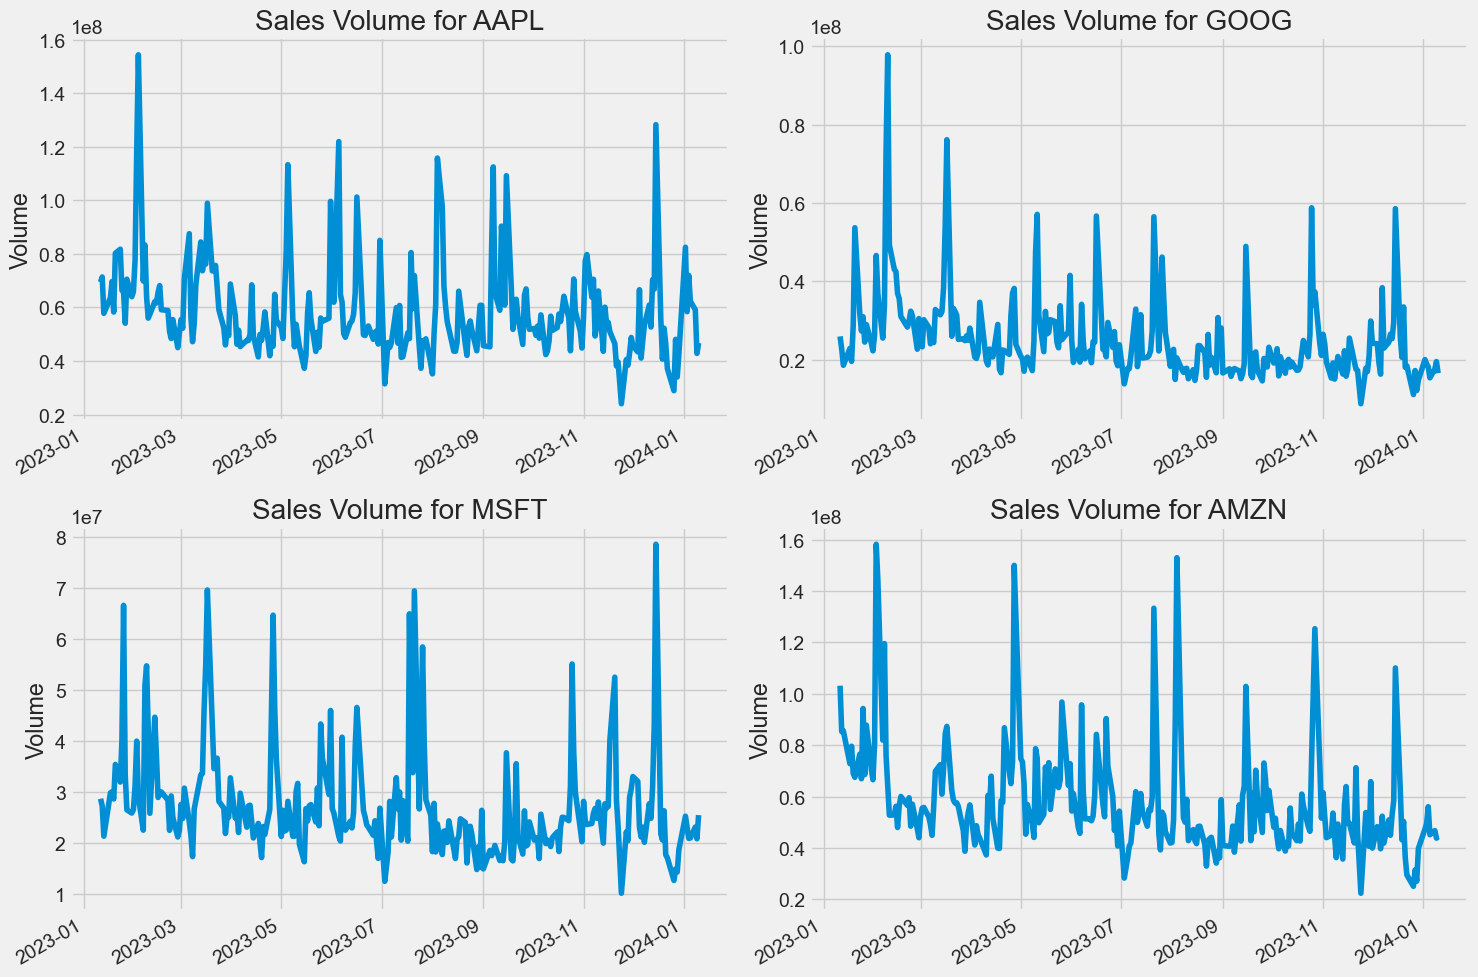

In [18]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

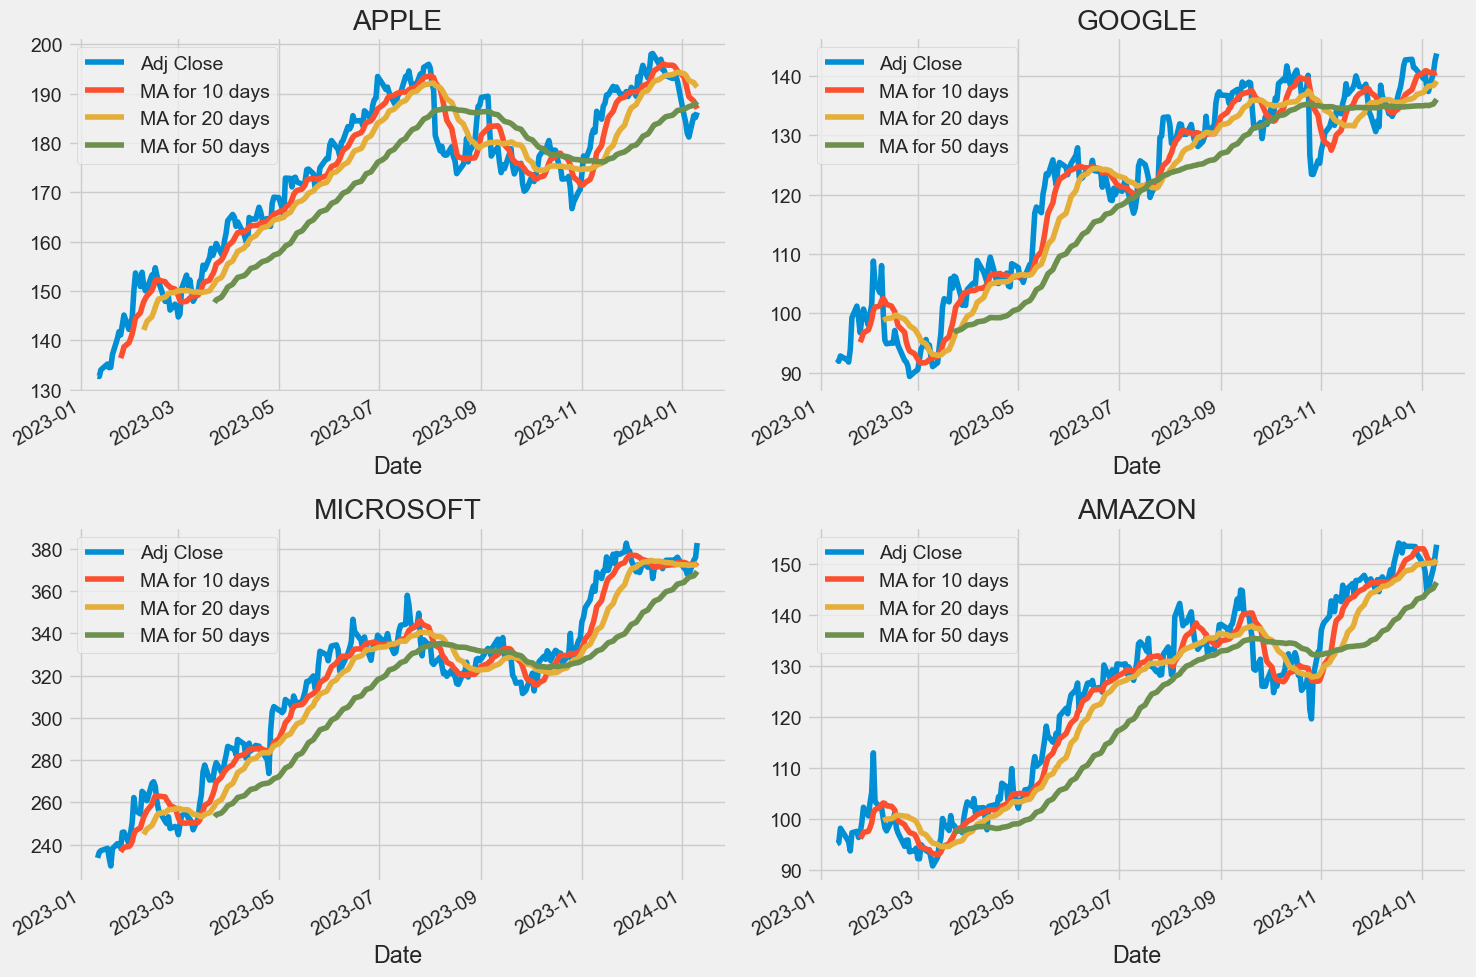

In [19]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [20]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2020-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675285,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200
...,...,...,...,...,...,...
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500


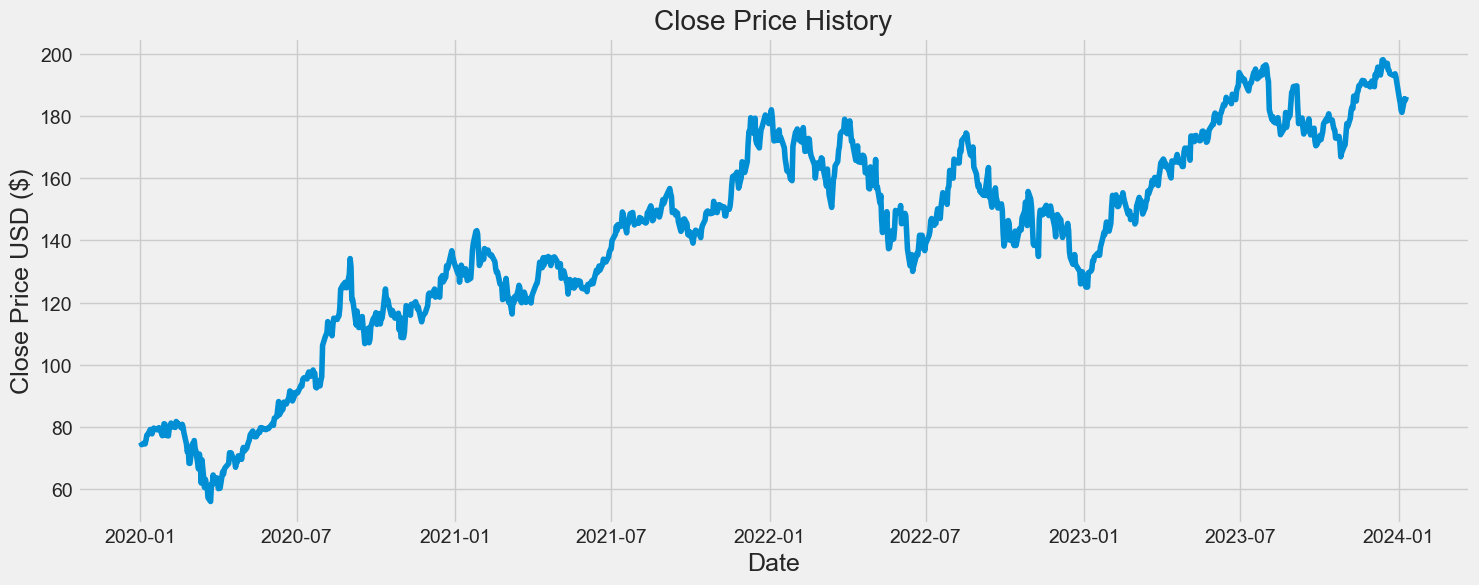

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

963

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.91163059],
       [0.90867322],
       [0.9160667 ]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
       0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
       0.15996267, 0.16610632, 0.16230396, 0.16429316, 0.16698649,
       0.16536695, 0.14889013, 0.16427554, 0.17598183, 0.17515447,
       0.14987592, 0.14837961, 0.16631755, 0.17089446, 0.17751333,
       0.16839474, 0.17107045, 0.16765538, 0.18101645, 0.17691481,
       0.17705567, 0.16658159, 0.17471438, 0.16887002, 0.15610751,
       0.12993116, 0.11215165, 0.12019645, 0.08652102, 0.08623935,
       0.13104019, 0.11433452, 0.13795834, 0.12067178, 0.11382401,
       0.07358251, 0.10732832, 0.08988328, 0.04200187, 0.09435458,
       0.0314046 , 0.05015228, 0.03925573, 0.03592868, 0.00857291,
       0.        , 0.03962541, 0.03723134, 0.05997502, 0.04113931])]
[0.05358494912411915]

[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
       0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
       0.15996267, 0.16610632, 0.16

In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

903/903 [==============================] - 39s 37ms/step - loss: 0.0039


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

2/2 [==============================] - 1s 93ms/step


In [27]:
rmse

18.048143630839242

/var/folders/b0/609fv9r92rdd7sl7rc_m3bzh0000gn/T/ipykernel_50191/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


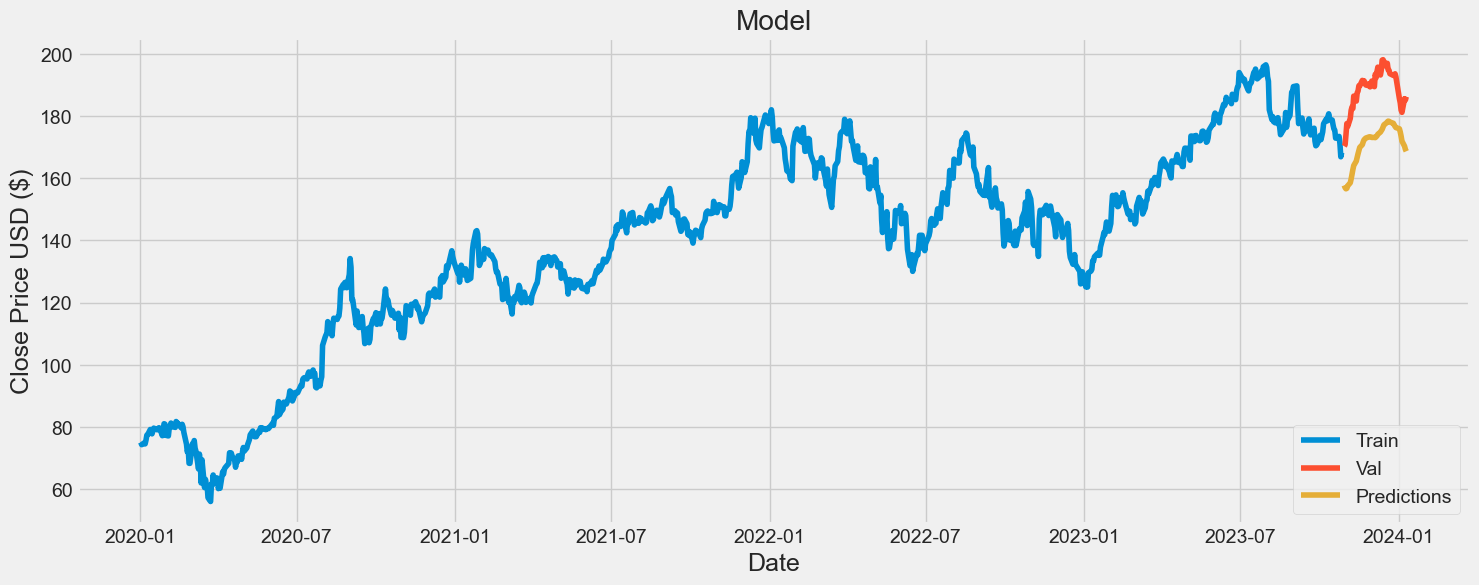

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-10-30,170.289993,157.712814
2023-10-31,170.770004,156.992798
2023-11-01,173.970001,156.601990
2023-11-02,177.570007,156.761948
2023-11-03,176.649994,157.560852
2023-11-06,179.229996,158.532394
2023-11-07,181.820007,159.754730
2023-11-08,182.889999,161.218353
2023-11-09,182.410004,162.741791


[*********************100%%**********************]  4 of 4 completed


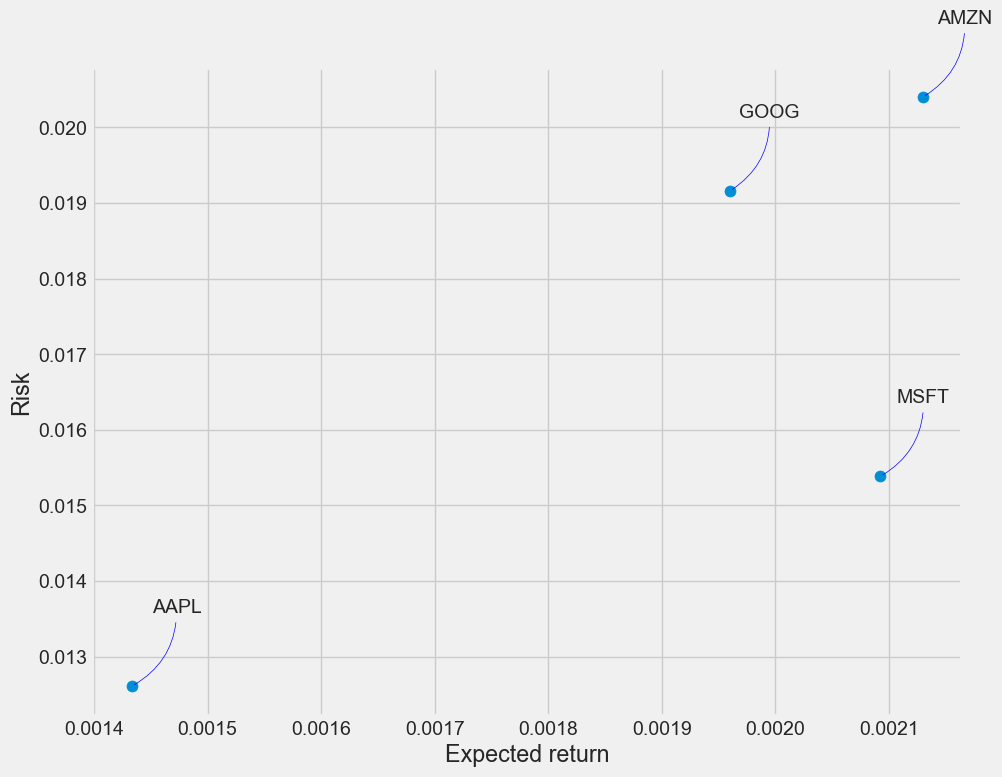

In [30]:
#RISK MANAGEMNET
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))